# TAREA FINAL: IMPORTACIÓN DE DATASET (.CSV), SIMULACIÓN DE LOGS Y GRÁFICO DE DATOS

Para este ejercicio propuesto lo primero que haremos es importar las librerías necesarias para trabajar con pandas, numpy, generación de gráficos con matplotlib y seaborn para generar distintos tipos de gráficos estadísticos para el mejor análisis de resultados.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se procederá a leer el dataset que hemos escogido para trabajar: **"Phishing_Email_1500m.csv"**

***Nota importante:*** El dataset original **"Phishing_Email.csv"** no pudo ser cargado a github por superar el tamaño permitido (25MB) ya que el peso es de 49,6 MB. [GitHub muestra el siguiente mensaje: Yowza, that’s a big file. Try again with a file smaller than 25MB.]

Por esta razón, se ha tomado solo las primeras 1500 muestras para reducir el tamaño del .csv a 2,35 MB **"Phishing_Email_1500m.csv"**

In [25]:
df = pd.read_csv("/workspaces/practica_tres_gr_9/Phishing_Email_1500m.csv", encoding="latin1", sep=";")
df.head()

,Column1,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [26]:
print("Dimension of the DataFrame:",df.shape)

Dimension of the DataFrame: (1501, 3)


## Preprocesamiento del DataFrame

Ejecutaremos el siguiente código para conocer cúantos elementos vacíos hay en cada columna.

In [27]:
df.isnull().sum()

Column1       0
Email Text    2
Email Type    0
dtype: int64

Como se observa en el resultado, en el archivo .csv hay una columna que no tiene nombre y se le ha asignado por defecto "Column1" al cargar/leer la data. Esta columna contiene índices que no son útiles para nuestro análisis, por lo cual esta columna será eliminada. 

Además, existen 2 filas que tienen elementos vacíos o nulos (null values) en la columna "Email Text", lo siguiente que haremos en removerlos o eliminarlos.

In [28]:
#Eliminación de la columna denominada "Column1"
#axis=1 indica que la operación se realizará a lo largo de las columnas del DataFrame

df.drop(["Column1"],axis=1,inplace=True)
print("Dimension of the row data:",df.shape)

Dimension of the row data: (1501, 2)


In [29]:
#Eliminación de filas que tienen elementos vacíos o nulos (null values)
#axis=0 se usa para operaciones a lo largo de las filas del DataFrame
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)
print("Dimension of the row data:",df.shape)

Dimension of the row data: (1448, 2)


Como parte del proceso general de limpieza de datos hemos: 

* **Eliminado muestras duplicadas o irrelevantes** y 

* **Tratado las muestras incompletas.**

In [30]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


Para asegurar que los valores en la columna Email Type siempre sean consistentes y se cuenten correctamente (sin importar como están escritos), es necesario normalizar esos valores convirtiendo todos los valores a minúsculas (o mayúsculas) para evitar diferencias de capitalización. En nuestro caso los convertiremos a minúsculas (**Lowercasing**).

In [31]:
#Comprobar si todos los valores de la columna 'Email Type' están en minúsculas
all_lowercase = df['Email Type'].apply(lambda x: x.islower()).all()
# Mostrar el resultado
print(all_lowercase)
print(df['Email Type'])
print(f"{'=' * 50}")

# Convertir todos los valores a minúsculas
df['Email Type'] = df['Email Type'].str.lower()  
# Mostrar el resultado
print(df['Email Type'])

False
0           Safe Email
1           Safe Email
2           Safe Email
3       Phishing Email
4       Phishing Email
             ...      
1496        Safe Email
1497    Phishing Email
1498        Safe Email
1499    Phishing Email
1500        Safe Email
Name: Email Type, Length: 1448, dtype: object
0           safe email
1           safe email
2           safe email
3       phishing email
4       phishing email
             ...      
1496        safe email
1497    phishing email
1498        safe email
1499    phishing email
1500        safe email
Name: Email Type, Length: 1448, dtype: object


* **Eliminar espacios innecesarios.**

A veces, los datos tienen espacios extra alrededor del texto. Eliminaremos los espacios antes y después de las cadenas en la columna "Email Type" para evitar que se cuenten como distintos:

In [47]:
# Eliminar espacios en blanco
df['Email Type'] = df['Email Type'].str.strip()  
print(df['Email Type'])

0           safe email
1           safe email
2           safe email
3       phishing email
4       phishing email
             ...      
1496        safe email
1497    phishing email
1498        safe email
1499    phishing email
1500        safe email
Name: Email Type, Length: 1448, dtype: object


Después de hacer las correcciones, ya tenemos los datos limpios y procedemos a verificar si ahora todas las filas tienen las dos únicas categorías correctas:

In [48]:
# Verificar los valores únicos en la columna
print(df['Email Type'].unique())  

['safe email' 'phishing email']


Finalmente, podemos contar la frecuencia de los valores únicos en la columna Email Type:

In [49]:
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)

Email Type
safe email        869
phishing email    579
Name: count, dtype: int64


Si sumamos la fecuencia de "safe email" y la de "phishing email" es igual al Length del DataFrame: 1448

In [32]:
# Usaremos los datos generados en el ejemplo anterior
# Para simplificar, recreamos un conjunto similar pero más pequeño

# Generar 500 registros de logs simulados
np.random.seed(42)

# Lista de eventos de seguridad
eventos = ['login_success', 'login_failure', 'file_access', 'admin_login', 
           'password_change', 'firewall_block', 'suspicious_activity', 
           'malware_detected', 'port_scan']

# Generar timestamps para una semana
fechas = pd.date_range(start='2023-01-01', periods=7)
timestamps = []
for fecha in fechas:
    for hora in range(24):
        for _ in range(3):  # 3 eventos por hora aprox
            timestamps.append(fecha + pd.Timedelta(hours=hora) + 
                             pd.Timedelta(minutes=np.random.randint(60)))

# Ajustar al número de registros deseados
timestamps = timestamps[:500]

# Generar IPs aleatorias
def random_ip():
    return f"{np.random.randint(1, 256)}.{np.random.randint(1, 256)}.{np.random.randint(1, 256)}.{np.random.randint(1, 256)}"

# Usuarios del sistema
usuarios = ['admin', 'user1', 'user2', 'user3', 'system', 'guest', None]

# Generar datos simulados
data = {
    'timestamp': timestamps,
    'ip_origen': [random_ip() for _ in range(500)],
    'evento': np.random.choice(eventos, 500, p=[0.3, 0.2, 0.2, 0.05, 0.05, 0.08, 0.07, 0.03, 0.02]),
    'usuario': np.random.choice(usuarios, 500, p=[0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1]),
    'severidad': np.random.choice(['low', 'medium', 'high', 'critical'], 500, p=[0.5, 0.3, 0.15, 0.05]),
    'exitoso': np.random.choice([True, False], 500, p=[0.8, 0.2]),
}

# Crear DataFrame
logs_df = pd.DataFrame(data)

# Configurar timestamp como índice
logs_df['timestamp'] = pd.to_datetime(logs_df['timestamp'])
logs_df = logs_df.sort_values('timestamp')

# Ahora creamos las visualizaciones
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Generamos datos 

Generar 500 registros de logs simulados

In [33]:
# Generar 500 registros de logs simulados
np.random.seed(42)

Lista de eventos de seguridad

In [34]:
eventos = ['login_success', 'login_failure', 'file_access', 'admin_login', 
           'password_change', 'firewall_block', 'suspicious_activity', 
           'malware_detected', 'port_scan']

Generar timestamps para una semana

In [35]:
fechas = pd.date_range(start='2023-01-01', periods=7)
timestamps = []
for fecha in fechas:
    for hora in range(24):
        for _ in range(3):  # 3 eventos por hora aprox
            timestamps.append(fecha + pd.Timedelta(hours=hora) + 
                             pd.Timedelta(minutes=np.random.randint(60)))

In [36]:
print(timestamps)

[Timestamp('2023-01-01 00:38:00'), Timestamp('2023-01-01 00:51:00'), Timestamp('2023-01-01 00:28:00'), Timestamp('2023-01-01 01:14:00'), Timestamp('2023-01-01 01:42:00'), Timestamp('2023-01-01 01:07:00'), Timestamp('2023-01-01 02:20:00'), Timestamp('2023-01-01 02:38:00'), Timestamp('2023-01-01 02:57:00'), Timestamp('2023-01-01 03:18:00'), Timestamp('2023-01-01 03:22:00'), Timestamp('2023-01-01 03:10:00'), Timestamp('2023-01-01 04:10:00'), Timestamp('2023-01-01 04:23:00'), Timestamp('2023-01-01 04:52:00'), Timestamp('2023-01-01 05:35:00'), Timestamp('2023-01-01 05:39:00'), Timestamp('2023-01-01 05:23:00'), Timestamp('2023-01-01 06:02:00'), Timestamp('2023-01-01 06:21:00'), Timestamp('2023-01-01 06:52:00'), Timestamp('2023-01-01 07:01:00'), Timestamp('2023-01-01 07:23:00'), Timestamp('2023-01-01 07:43:00'), Timestamp('2023-01-01 08:29:00'), Timestamp('2023-01-01 08:37:00'), Timestamp('2023-01-01 08:01:00'), Timestamp('2023-01-01 09:59:00'), Timestamp('2023-01-01 09:20:00'), Timestamp('20

Ajustar al número de registros deseados

In [37]:
timestamps = timestamps[:500]

Crear DataFrame

In [38]:
logs_df = pd.DataFrame(data)

Configurar timestamp como índice

In [39]:
logs_df['timestamp'] = pd.to_datetime(logs_df['timestamp'])
logs_df = logs_df.sort_values('timestamp')

# Ahora creamos las visualizaciones

In [40]:
# Crear DataFrame
logs_df = pd.DataFrame(data)

# Configurar timestamp como índice
logs_df['timestamp'] = pd.to_datetime(logs_df['timestamp'])
logs_df = logs_df.sort_values('timestamp')

# Ahora creamos las visualizaciones
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

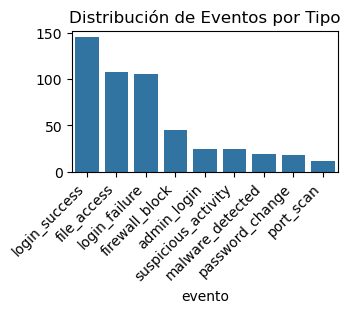

In [41]:
# 1. Distribución de eventos por tipo
plt.subplot(2, 2, 1)
eventos_count = logs_df['evento'].value_counts()
sns.barplot(x=eventos_count.index, y=eventos_count.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Eventos por Tipo')
plt.tight_layout()

# 2. Distribución de eventos por severidad

Text(0.5, 1.0, 'Distribución de Eventos por Severidad')

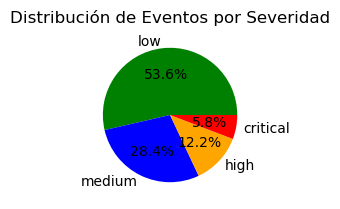

In [42]:
plt.subplot(2, 2, 2)
severidad_count = logs_df['severidad'].value_counts()
colors = {'low': 'green', 'medium': 'blue', 'high': 'orange', 'critical': 'red'}
plt.pie(severidad_count, labels=severidad_count.index, autopct='%1.1f%%', colors=[colors[sev] for sev in severidad_count.index])
plt.title('Distribución de Eventos por Severidad')

# 3. Actividad por hora del día

Text(0, 0.5, 'Número de Eventos')

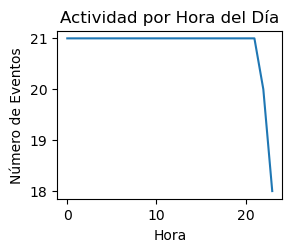

In [43]:
plt.subplot(2, 2, 3)
logs_df['hour'] = logs_df['timestamp'].dt.hour
hourly_count = logs_df.groupby('hour').size()
sns.lineplot(x=hourly_count.index, y=hourly_count.values)
plt.title('Actividad por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Número de Eventos')

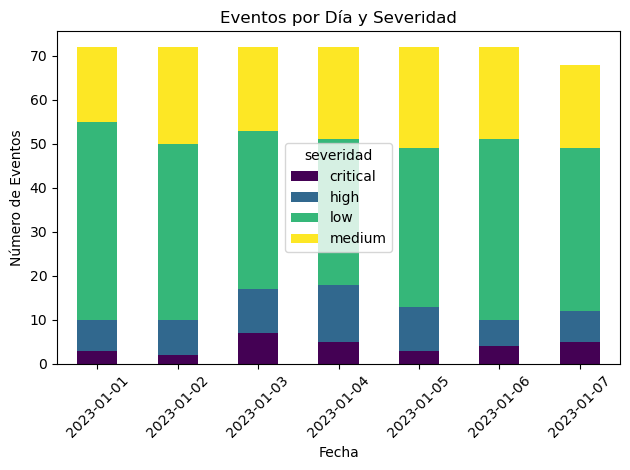

In [44]:
# 4. Eventos por día y por severidad
# plt.subplot(2, 2, 4)
logs_df['date'] = logs_df['timestamp'].dt.date
pivot_table = pd.crosstab(logs_df['date'], logs_df['severidad'])
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Eventos por Día y Severidad')
plt.xlabel('Fecha')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('security_dashboard.png')